In [ ]:
! pip install verstack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 49.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 36.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.7/155.7 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for verstack: filename=verstack-3.8.11-py3-none-any.whl size=80629 sha256=375ce6b3c60e87560fd35ab53905bb87523d7041de35c0112785b1dc60229938
  Stored in directory: /root/.cache/pip/wheels/c6/fc/c7/c550185d6fb7409cf2e201e7b63ea204b21ee0262c32288ed5
Successfully built verstack
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.

In [ ]:
! verstack --version

/bin/bash: line 1: verstack: command not found


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from verstack.stratified_continuous_split import scsplit
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

## Reading and preprocessing the data

In [ ]:
data = pd.read_csv('forestfires.csv')

In [ ]:
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [ ]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Understanding data through histograms

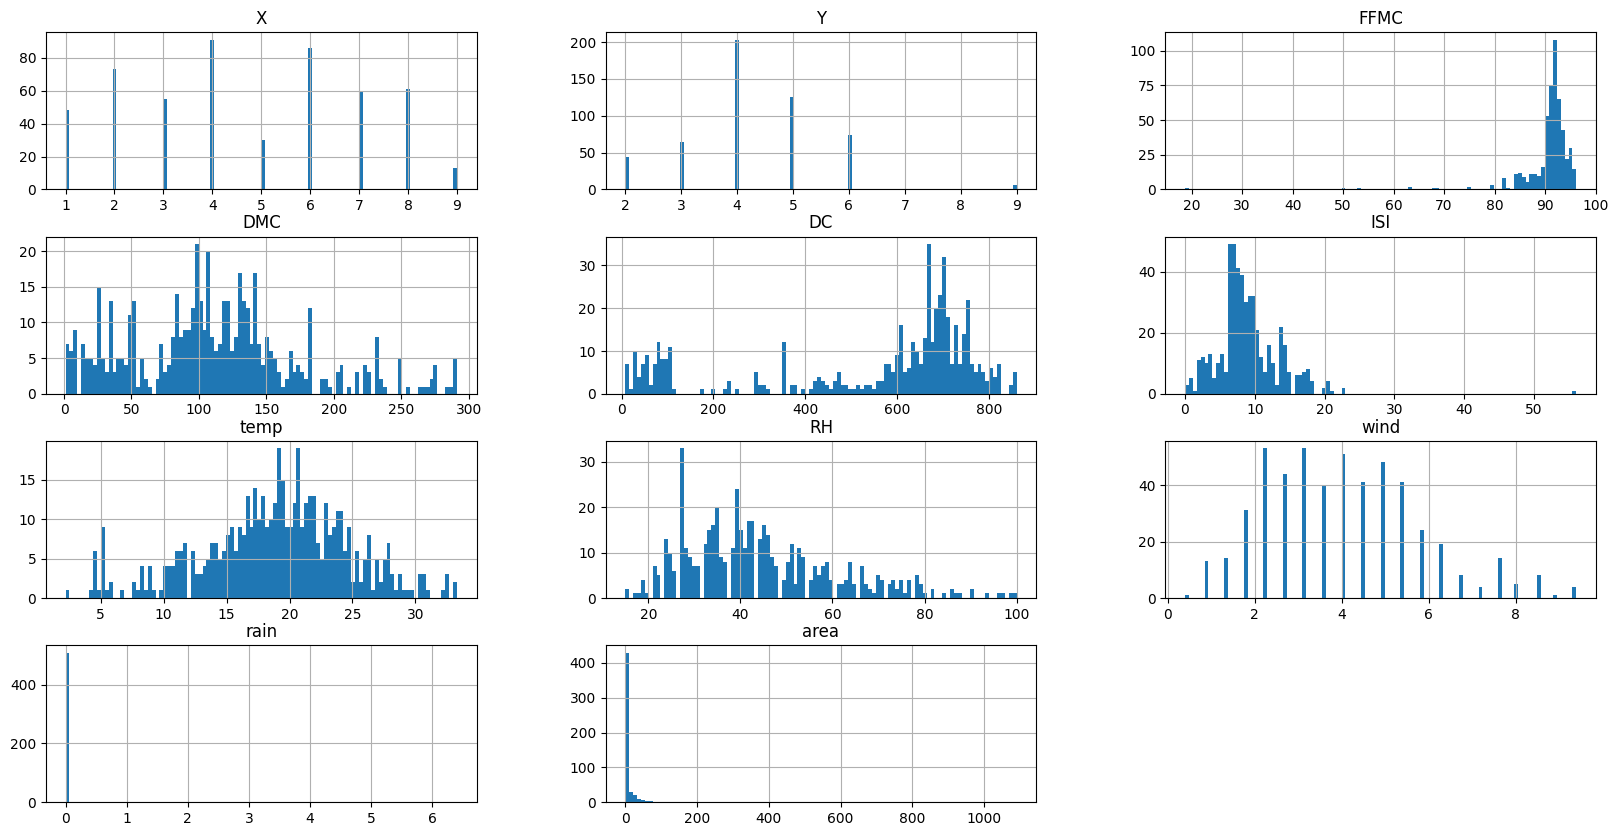

In [ ]:
fig = plt.figure(figsize = (20, 10))
ax = fig.gca()
data.hist(bins = 100, ax = ax)
plt.show()

In [ ]:
data['area'].value_counts()

0.00      247
1.94        3
0.52        2
3.71        2
0.68        2
         ... 
105.66      1
154.88      1
196.48      1
200.94      1
11.16       1
Name: area, Length: 251, dtype: int64

## **Checking The Correlations**
Columns which contain non-numeric values will be dropped. After that correlation will be checked.

In [ ]:
data_copy = data.copy()
data_copy.drop(['month', 'day'], axis = 1)
corr = data_copy.corr()
corr['area'].sort_values(ascending = False)

area    1.000000
temp    0.097844
DMC     0.072994
X       0.063385
DC      0.049383
Y       0.044873
FFMC    0.040122
wind    0.012317
ISI     0.008258
rain   -0.007366
RH     -0.075519
Name: area, dtype: float64

## **Dropping columns with low correlations with target variable**

In [ ]:
data_processed = data_copy.drop(['rain', 'ISI', 'month', 'day'], axis = 1)
data_processed

,X,Y,FFMC,DMC,DC,temp,RH,wind,area
0,7,5,86.2,26.2,94.3,8.2,51,6.7,0.00
1,7,4,90.6,35.4,669.1,18.0,33,0.9,0.00
2,7,4,90.6,43.7,686.9,14.6,33,1.3,0.00
3,8,6,91.7,33.3,77.5,8.3,97,4.0,0.00
4,8,6,89.3,51.3,102.2,11.4,99,1.8,0.00
...,...,...,...,...,...,...,...,...,...
512,4,3,81.6,56.7,665.6,27.8,32,2.7,6.44
513,2,4,81.6,56.7,665.6,21.9,71,5.8,54.29
514,7,4,81.6,56.7,665.6,21.2,70,6.7,11.16
515,1,4,94.4,146.0,614.7,25.6,42,4.0,0.00


## **Split the data into train and test set.**
Stratification is done with respect to the target variable ('area'). 30% of samples are taken out for the test set. Random state is taken to be 5 (default).

In [ ]:
train, test = scsplit(data_processed, stratify = data_processed['area'])

In [ ]:
x_train = train.drop('area', axis = 1)
y_train = train['area'].copy()
x_test = test.drop('area', axis = 1)
y_test = test['area'].copy()

## **Creating a Simple Pipeline**

In [ ]:
pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'mean')),\
 ('std_scaler', StandardScaler())\
                     ])
x_train_processed_transform = pipeline.fit_transform(x_train)

In [ ]:
print(len(x_train_processed_transform[0]))
print(x_test)

8
     X  Y  FFMC    DMC     DC  temp  RH  wind
218  4  5  92.9  133.3  699.6  19.4  19   1.3
272  2  5  92.1  152.6  658.2  20.2  47   4.0
266  6  5  94.3  131.7  607.1  19.4  55   4.0
465  2  2  79.5    3.6   15.3   4.6  59   0.9
67   2  2  92.4  117.9  668.0  19.6  33   5.4
..  .. ..   ...    ...    ...   ...  ..   ...
495  6  6  96.2  175.5  661.8  23.9  42   2.2
366  4  5  91.1  132.3  812.1  15.9  38   5.4
335  4  3  91.6  108.4  764.0   9.8  86   1.8
446  6  5  92.0  203.2  664.5  19.1  70   2.2
390  7  4  84.7    9.5   58.3   7.5  71   6.3

[156 rows x 8 columns]


## **Applying ML model to the data**

In [ ]:
model = RandomForestRegressor()
# model = DecisionTreeRegressor()
# model = LinearRegression()
model.fit(x_train_processed_transform, y_train)

RandomForestRegressor()

## **Cross Validating the model**

In [ ]:
x_test_processed_transform = pipeline.transform(x_test)
scores = cross_val_score(model, x_test_processed_transform, y_test, scoring = "neg_mean_squared_error", cv = 50)
rmse_score = np.sqrt(-scores)

In [ ]:
print(rmse_score.mean())
print(rmse_score.std())

22.139102317537155
26.05641945360371


In [ ]:
print(y_test)

218    31.72
272     3.09
266     0.17
465     6.84
67      0.00
       ...  
495     0.00
366     1.75
335     0.00
446     0.00
390     9.96
Name: area, Length: 156, dtype: float64


In [ ]:
from sklearn.metrics import mean_squared_error
test_predictions = model.predict(x_test_processed_transform)
mean_squared_error = mean_squared_error(y_test, test_predictions)
rmse = np.sqrt(mean_squared_error)
print("Root mean squared error: ", rmse)

Root mean squared error:  43.177515715572724
